# ODE Simulation
@author Li Zhicong

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## AND Gate ODE Model

Input1:

1. $\frac{dG_{in}}{dt} =-r_1G_{in}$ 

2. $\frac{dm_1}{dt} =a_{p_1}-r_{m_1}m_1$

3. $\frac{dp_1}{dt} =m_1b_{p_1}-r_{p_1}p_1$

Input2:

4. $\frac{dI}{dt} =-r_2I$

5. $\frac{dm_2}{dt} =a_{p_2}-r_{m_2}m_2$

6. $\frac{dp_2}{dt} =m_2b_{p_2}-r_{p_2}p_2$

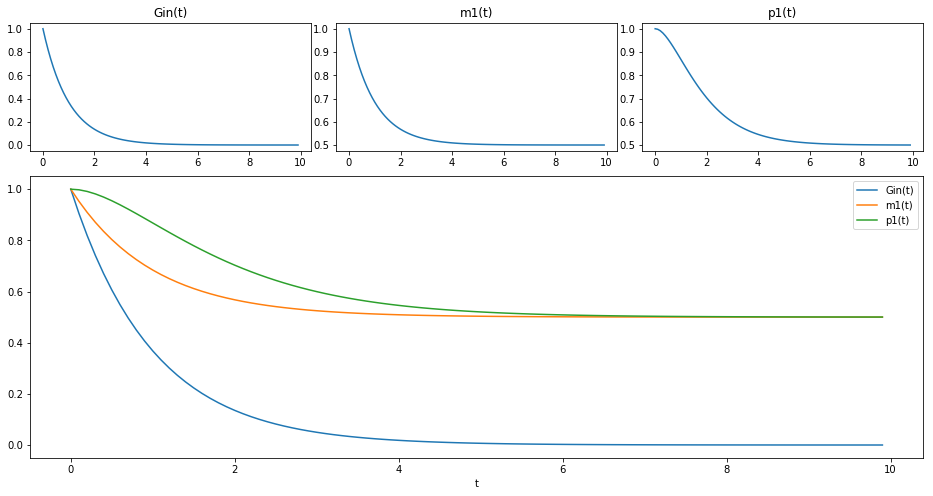

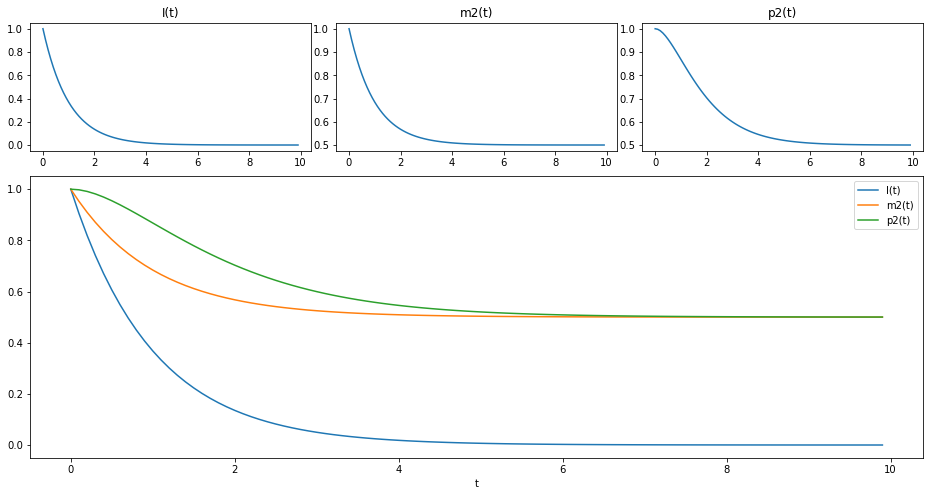

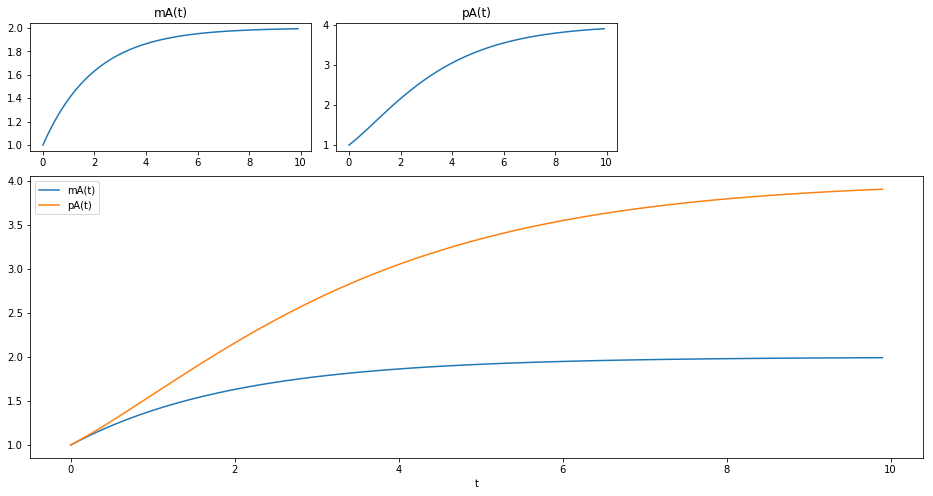

In [8]:
'''
para：
    Gin：葡萄糖浓度
    m1：m1,m2分别表示基因序列转录得到的mRNA_{Gal4}
    p1：Gal4蛋白
    I：VP16诱导物浓度
    m2：m1,m2分别表示基因序列转录得到的mRNA_{VPR}
    p2：VPR蛋白
    r1：血糖浓度的消耗速率
    r2：VPR诱导物的消耗速率
    rm1：mRNA_{Gal4}降解速率
    rm2：mRNA_{VPR}降解速率
    rp1：Gal4蛋白降解速率
    rp2：VPR蛋白降解速率
    bp1：Gal4翻译速率
    bp2：VPR翻译速率
    
    ma：insulin基因转录产生的mRNA量
    pa：insulin量
    apa：转录速率
    bpa：翻译速率
    rma：mRNA降解速率
    rpa：蛋白质降解速率
'''
class And_Gate:
    def __init__(self, tbegin = 0, tend = 10, tstep = 0.1, 
                 G0 = 1.0, m10 = 1.0, p10 = 1.0, I0 = 1.0, m20 = 1.0, p20 = 1.0, 
                 r1 = 1, ap1 = 0.5, rm1 = 1, bp1 = 1, rp1 = 1, 
                 r2 = 1, ap2 = 0.5, rm2 = 1, bp2 = 1, rp2 = 1,
                 ma0 = 1.0, pa0 = 1.0, 
                 apa = 1.0, rma = 0.5,
                 bpa = 1.0, rpa = 0.5
                ):
        self.tbegin = tbegin
        self.tend = tend 
        self.tstep = tstep
        self.G0 = G0
        self.m10 = m10
        self.p10 = p10
        self.I0 = I0 
        self.m20 = m20
        self.p20 = p20
        self.r1 = r1
        self.ap1 = ap1
        self.rm1 = rm1
        self.bp1 = bp1
        self.rp1 = rp1
        self.r2 = r2
        self.ap2 = ap2
        self.rm2 = rm2
        self.bp2 = bp2
        self.rp2 = rp2
        self.ma0 = ma0
        self.pa0 = pa0
        self.apa = apa
        self.rma = rma
        self.bpa = bpa
        self.rpa = rpa
    # 定义微分方程
    def input1_equation(self, Y, t):
        Gin, m1, p1 = Y[0], Y[1], Y[2]
        return np.array([-self.r1 * Gin, self.ap1 - self.rm1 * m1, m1 * self.bp1 - self.rp1 * p1])

    def input2_equation(self, Y, t):
        I, m2, p2 = Y[0], Y[1], Y[2]
        return np.array([-self.r2 * I, self.ap2 - self.rm2 * m2, m2 * self.bp2 - self.rp2 * p2])

    def output_equation(self, Y, t):
        ma, pa = Y[0], Y[1]
        return np.array([self.apa - self.rma * ma, ma * self.bpa - self.rpa * pa])
    
    # 打印fig
    def show_input_fig(self, Y, t, namelist):
        fig = plt.figure(figsize = (16, 8))
        gs = plt.GridSpec(3, 6)
        ax = [None] * 4
        ax[0] = fig.add_subplot(gs[0, :2])
        ax[1] = fig.add_subplot(gs[0, 2:4])
        ax[2] = fig.add_subplot(gs[0, 4:6])
        ax[3] = fig.add_subplot(gs[1:4, :])

        for i in range(3):
            ax[i].set_title(namelist[i]+'(t)')
            ax[i].plot(t, Y[:, i])
    
        ax[3].set_xlabel('t')
        for i in range(3): 
            
            ax[3].plot(t, Y[:, i], label = namelist[i] + '(t)')
        plt.legend()
        plt.show()
        
        
    def show_output_fig(self, Y, t, namelist):
        fig = plt.figure(figsize = (16, 8))
        gs = plt.GridSpec(3, 6)
        ax = [None] * 4
        ax[0] = fig.add_subplot(gs[0, :2])
        ax[1] = fig.add_subplot(gs[0, 2:4])
        ax[2] = fig.add_subplot(gs[1:3, :])
        for i in range(2):
            ax[i].set_title(namelist[i]+'(t)')
            s = ax[i].plot(t, Y[:, i])

        ax[2].set_xlabel('t')
        for i in range(2):
            ax[2].plot(t, Y[:, i], label = namelist[i] + '(t)')
            
        plt.legend()
        plt.show()
    
    
    # 解ode
    def solve_input_ode(self, show = True):
        t = np.arange(self.tbegin, self.tend, self.tstep)
        Y1 = odeint(self.input1_equation, [self.G0, self.m10, self.p10], t)
        Y2 = odeint(self.input2_equation, [self.I0, self.m20, self.p20], t)
        if show == False:
            return
        self.show_input_fig(Y1, t, ['Gin', 'm1', 'p1'])
        self.show_input_fig(Y2, t, ['I', 'm2', 'p2'])
        
    def solve_output_ode(self, show = True):
        t = np.arange(self.tbegin, self.tend, self.tstep)
        Y = odeint(self.output_equation, [self.ma0, self.pa0], t)
        if show == False:
            return 
        self.show_output_fig(Y, t, ['mA', 'pA'])
        
        
sol = And_Gate()
sol.solve_input_ode()
sol.solve_output_ode()

# 开始耦合二级方程
方程1 中细胞内葡萄糖浓度$G_{in}$的变化
## 7. $\frac{dG_{in}}{dt} = \frac{1}{V_c}R_1(G_{out}) -R_2(G_{in}, A)$
R1，R2可以给常数
我一边看看R1有没有合适的表达式

方程2 $mRNA_{Gal4}$的变化
## 8.  $\frac{dM_{Gal4}}{dt}=v_{max}n_{buff}n_{Gal4}\rho_{Gal4}(G_{i})-k_{de}M_{Gal4}$
## 9.  $\rho_{Gal4}(Gi)=\frac{Gi^{n_{HGal4}}}{K_{MGi}+Gi^{n_{Gal4}}}$

方程3 $P_{Gal4}$的变化

## 10. $\frac{dP_{Gal4}}{d_t} = k_{tl}M_{Gal4}-k_{ds}P_{Gal4}$
方程10与方程3实质一致

# 模仿 把output的报告基因也写了，参照Notion上的 The ODE of report gene's expression

In [ ]:
'''
para：
    Gin：葡萄糖浓度
    Vc：单个细胞体积
    R1(Gout)：胞外胶囊中葡萄糖浓度
    R2(Gin, A)：胞内葡萄糖浓度和胞内ATP浓度的函数
    A：胞内ATP浓度
    
    MGal4：mRNA浓度
    vmax：mRNA_{Gal4}转录最大速率
    nbuff：调控原件DNA序列重复次数
    nGal4：Gal4质粒平均转染数
    rho_Gal4(Gin)：胞内葡萄糖激活启动子的希尔方程
    kde：mRNA降解常数
    nHGal4：反应希尔系数
    K_MGin：希尔反应抑制常数
    
    PGal4：胞内Gal4蛋白浓度
    ktl：蛋白翻译常量
    MGal4：胞内Gal4mRNA浓度
    kds：Gal4蛋白降解常数
'''
class And_Gate:
    def __init__(self, tbegin = 0, tend = 10, tstep = 0.1, 
                 Gin0 = 1.0, Vc = 1.0, ...
                 MGal40 = 1.0, vmax = 1.0, nbuff = 2.0, nGal4 = 2.0, kde = 0.5, KMGin = 0.1, nHGal4 = 1.0
                 PGal4 = 1.0, MGal4 = 1.0, ktl = 1.0, kds = 1.0
                ):
        self.tbegin = tbegin
        self.tend = tend 
        self.tstep = tstep
        self.Gin0 = Gin0
        self.Vc = Vc
        ...
        self.MGal40 = MGal40
        self.vmax = vmax
        self.nbuff = nbuff
        self.nGal4 = nGal4
        self.kde = kde
        self.KMGin = KMGin,
        self.nHGal4 = n_HGal4
        
        self.PGal4 = PGal4
        self.MGal4 = MGal4
        self.ktl = ktl
        self.kds = kds
        
    # 希尔方程定义
    def rho_Gal4(Gin):
        return (Gin ** self.nHGal4) / (self.KMGin + Gin ** self.nGal4)
    # 定义微分方程
    def input1_equation(self, Y, t):
        Gin, MGal4, PGal4 = Y[0], Y[1], Y[2]
        return np.array([..., self.vmax * self.nbuff * self.nGal4 * self.rho_Gal4(Gin) - self.kde * MGal4, self.ktl * MGal4 - self.kds * PGal4])
    '''
    def input2_equation(self, Y, t):
        I, m2, p2 = Y[0], Y[1], Y[2]
        return np.array([-self.r2 * I, self.ap2 - self.rm2 * m2, m2 * self.bp2 - self.rp2 * p2])
    '''
    def output_equation(self, Y, t):
        ma, pa = Y[0], Y[1]
        return np.array([self.apa - self.rma * ma, ma * self.bpa - self.rpa * pa])
    
    # 打印fig
    def show_input_fig(self, Y, t, namelist):
        fig = plt.figure(figsize = (16, 8))
        gs = plt.GridSpec(3, 6)
        ax = [None] * 4
        ax[0] = fig.add_subplot(gs[0, :2])
        ax[1] = fig.add_subplot(gs[0, 2:4])
        ax[2] = fig.add_subplot(gs[0, 4:6])
        ax[3] = fig.add_subplot(gs[1:4, :])

        for i in range(3):
            ax[i].set_title(namelist[i]+'(t)')
            ax[i].plot(t, Y[:, i])
    
        ax[3].set_xlabel('t')
        for i in range(3): 
            
            ax[3].plot(t, Y[:, i], label = namelist[i] + '(t)')
        plt.legend()
        plt.show()
        
        
    def show_output_fig(self, Y, t, namelist):
        fig = plt.figure(figsize = (16, 8))
        gs = plt.GridSpec(3, 6)
        ax = [None] * 4
        ax[0] = fig.add_subplot(gs[0, :2])
        ax[1] = fig.add_subplot(gs[0, 2:4])
        ax[2] = fig.add_subplot(gs[1:3, :])
        for i in range(2):
            ax[i].set_title(namelist[i]+'(t)')
            s = ax[i].plot(t, Y[:, i])

        ax[2].set_xlabel('t')
        for i in range(2):
            ax[2].plot(t, Y[:, i], label = namelist[i] + '(t)')
            
        plt.legend()
        plt.show()
    
    
    # 解ode
    def solve_input_ode(self, show = True):
        t = np.arange(self.tbegin, self.tend, self.tstep)
        Y1 = odeint(self.input1_equation, [self.G0, self.m10, self.p10], t)
        Y2 = odeint(self.input2_equation, [self.I0, self.m20, self.p20], t)
        if show == False:
            return
        self.show_input_fig(Y1, t, ['Gin', 'm1', 'p1'])
        self.show_input_fig(Y2, t, ['I', 'm2', 'p2'])
        
    def solve_output_ode(self, show = True):
        t = np.arange(self.tbegin, self.tend, self.tstep)
        Y = odeint(self.output_equation, [self.ma0, self.pa0], t)
        if show == False:
            return 
        self.show_output_fig(Y, t, ['mA', 'pA'])
        
        
sol = And_Gate()
sol.solve_input_ode()
sol.solve_output_ode()